In [5]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.metrics import adjusted_rand_score

In [2]:
#dataset preparation
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.50, random_state=0)

['y', 'b', 'g', 'r']


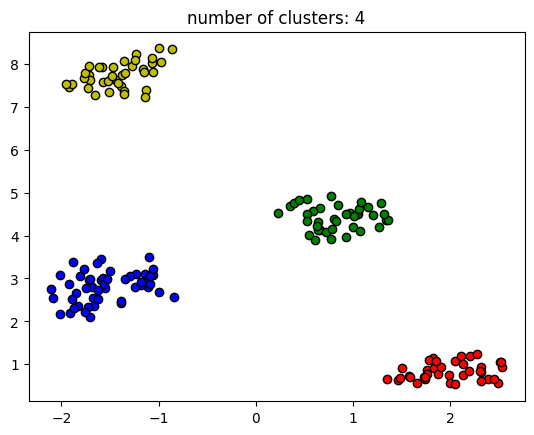

In [3]:
#applying dbscan clustering
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

unique_labels = set(labels)
colors = ['y', 'b', 'g', 'r']
print(colors)
for k, col in zip(unique_labels, colors):
    if k == -1:

        col = 'k'

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k',
             markersize=6)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k',
             markersize=6)

plt.title('number of clusters: %d' % n_clusters_)
plt.show()


In [6]:
#evaluation metrics
sc = metrics.silhouette_score(X, labels)
print("Silhouette Coefficient:%0.2f" % sc)
ari = adjusted_rand_score(y_true, labels)
print("Adjusted Rand Index: %0.2f" % ari)


Silhouette Coefficient:0.13
Adjusted Rand Index: 0.31


optics clusterinng

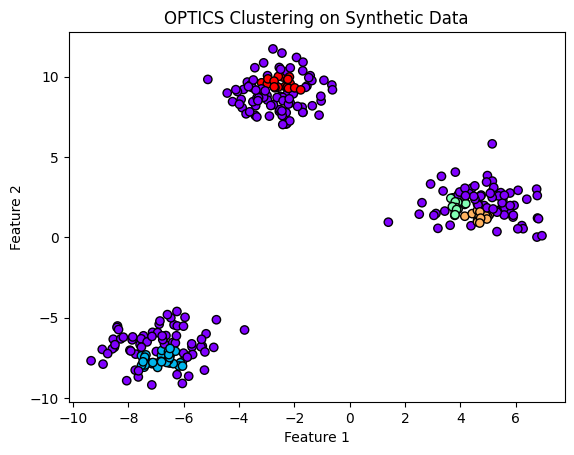

In [7]:
from sklearn.cluster import OPTICS
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

X, _ = make_blobs(n_samples=300, centers=3, random_state=42)

clustering = OPTICS(min_samples=5, xi=0.05, min_cluster_size=0.05)
clustering.fit(X)

labels = clustering.labels_

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='rainbow', edgecolor='k')
plt.title("OPTICS Clustering on Synthetic Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()